In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import ipywidgets as widgets

In [ ]:
%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.


### Cournot Game with Expectations

In this version of a stackelberg game we have $N$ firms. A share, $\lambda$ of them set their expectations "adaptively". They consider the changes in demand in the previous period as representing how demand will evolve in this new period. 

$E[Q_t] = Q_{t-1} + \Delta Q_{t-1} = Q_{t}^{AE}$

The remaining $1-\lambda$ set their expectations rationally. That is, they know the stochastic process driving demand. 

$E[Q_t] = \rho \cdot Q_{t-1} = Q_{t}^{RE}$


The timing of the game is such that both firms must lock in their quantities one period prior. Call this a 'production lag'. A further assumption we can make is that, absent communication between the firms, the firms with adaptive expectations will assume all firms are producing with Adaptive Expectations. The RE firms, however, know that $\lambda$ firms are producing under adaptive expectations and the rest under rational expectations.

### Solution to Simple Model

Here we solve for the "equilibrium". In this equilibrium, firms 

interactive(children=(FloatSlider(value=2000.0, description='E1', max=2000.0), FloatSlider(value=1500.0, descr…

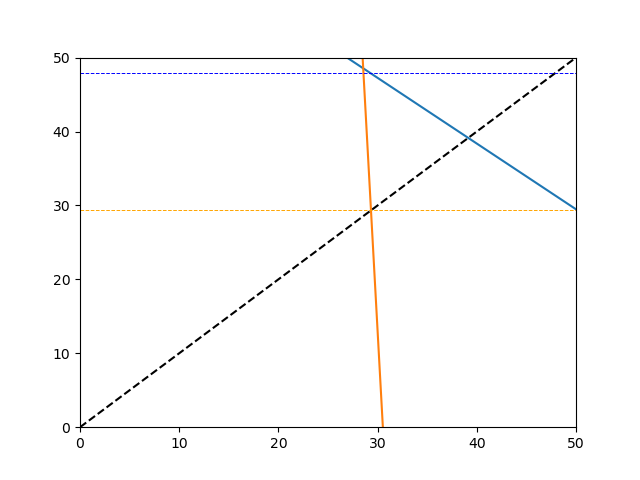

In [2]:
%matplotlib widget
from ipywidgets import *
import ipympl
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 50,100)

def f(x, E1, E2, b, c, lam, N=50):
    return (E1 - b*c-(lam*N-1)*x)/(2+(1-lam)*N)

def g(x, E1, E2, b, c, lam, N=50):
    return (E2 - b*c-(N-1)*x)/(2)

def q_AE(x, E1, E2, b, c, lam, N=50):
    return np.ones(len(x))*(E2-b*c)/(N+1)

def q_RE(x, E1, E2, b, c, lam, N=50):
    return (E1 - b*c - (lam*N-1)*(np.ones(len(x))*(E2-b*c)/(N+1)))/(2+(1-lam)*N)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
lin45, = ax.plot(np.linspace(0, 50,100), np.linspace(0, 50,100), color='black', linestyle='--')
line, = ax.plot(x, f(x, E1 = 100, E2 = 75, b = 2, c = 2, lam = 0.5))
line2, = ax.plot(x, g(x, E1 = 100, E2 = 75, b = 2, c = 2, lam = 0.5))
line3, = ax.plot(x, q_AE(x, E1 = 100, E2 = 75, b = 2, c = 2, lam = 0.5), color = 'orange', linestyle = '--', linewidth = 0.7)
line4,  = ax.plot(x, q_RE(x, E1 = 100, E2 = 75, b = 2, c = 2, lam = 0.5), color = 'blue', linestyle = '--', linewidth = 0.7)



ax.set_xlim([0, 50])
ax.set_ylim([0, 50])

def update(E1 = 2000, E2 = 1500, b = 2, c = 2, lam = 0.5):
    line.set_ydata(f(x,E1, E2, b, c, lam))
    line2.set_ydata(g(x,E1, E2, b, c, lam))
    line3.set_ydata(q_AE(x,E1, E2, b, c, lam))
    line4.set_ydata(q_RE(x,E1, E2, b, c, lam))
    fig.canvas.draw_idle()
    
interact(update, E1 = (0,2000,0.1), E2 = (0,2000,0.1), b = (0,10,0.1), c = (0,10,0.1), lam = (0,1,0.1));

I want to add total production to this graph as well. So that I can see the evolution of overall production for each of these values. I wonder if it's possible to add a second axis and plot. I suspect it should be possible. Probably not even that hard to do tbh